In [40]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from config import api_key

In [41]:
# adding API results to a dataframe

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': f'Bearer {api_key}'}
params = {
    'latitude': 36.1627,
    'longitude': -86.7816,
    'radius': 5000,
    'categories': 'restaurants',
    'limit': 50
}

response = requests.get(url, headers=headers, params=params)

# creating empty lists for data frame
results = {'Name': [], 'Rating': [], 'Pricing': [], 'Number of Reviews': []}

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json().get('businesses', [])
    
    # Loop through each restaurant
    for d in data:
        results['Name'].append(d['name'])
        results['Rating'].append(d['rating'])
        # Check if 'price' key exists in the data
        if 'price' in d:
            results['Pricing'].append(len(d['price']))
        else:
            results['Pricing'].append('N/A')
        results['Number of Reviews'].append(d['review_count'])
        
restaurant_info_df = pd.DataFrame(results)
restaurant_info_df

restaurant_info_df.to_csv('restaurant-info.csv', index=False)

In [42]:
# creating dataframe of restaurant categories
category_results = {'Name': [], 'Category': []}

# Check if the response was successful
if response.status_code == 200:

    # Loop through each restaurant
    for d in data:
        category_results['Name'].append(d['name'])
        category_results['Category'].append(d['categories'][0]['title'])
        
category_df = pd.DataFrame(category_results)
category_df

category_df.to_csv('restaurant-categories.csv', index=False)


In [43]:
# printing API results

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': f'Bearer {api_key}'}
params = {
    'latitude': 36.1627,
    'longitude': -86.7816,
    'radius': 1000,
    'categories': 'restaurants',
    'limit': 50
}

response = requests.get(url, headers=headers, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json().get('businesses', [])
    
    # Loop through each restaurant
    for d in data:
        print("Restaurant: {}".format(d['name']))
        print("Rating: {}".format(d['rating']))
        # Check if 'price' key exists in the data
        if 'price' in d:
            print("Pricing: {}".format(len(d['price'])))
        else:
            print("Pricing data not available")
        print("Reviews: {}".format(d['review_count']))
        print()
else:
    # Print error message if the response was not successful
    print("Error:", response.status_code)

Restaurant: The Stillery
Rating: 4.4
Pricing: 2
Reviews: 3424

Restaurant: Sixty Vines
Rating: 4.5
Pricing: 2
Reviews: 944

Restaurant: Puckett's Restaurant - Nashville
Rating: 3.9
Pricing: 2
Reviews: 3290

Restaurant: The Twelve Thirty Club
Rating: 4.3
Pricing data not available
Reviews: 788

Restaurant: Skull's Rainbow Room
Rating: 4.5
Pricing: 3
Reviews: 1331

Restaurant: Boqueria Fifth + Broadway
Rating: 3.9
Pricing: 2
Reviews: 176

Restaurant: Stateside Kitchen
Rating: 4.1
Pricing data not available
Reviews: 323

Restaurant: Blanco Cocina + Cantina
Rating: 4.5
Pricing: 2
Reviews: 334

Restaurant: Deacon's New South
Rating: 4.1
Pricing: 3
Reviews: 343

Restaurant: The Standard At The Smith House
Rating: 4.3
Pricing: 3
Reviews: 368

Restaurant: Hattie B’s Hot Chicken - Nashville - Lower Broadway
Rating: 4.4
Pricing: 2
Reviews: 814

Restaurant: Frothy Monkey
Rating: 3.9
Pricing: 2
Reviews: 1260

Restaurant: Blue Sushi Sake Grill
Rating: 4.0
Pricing: 2
Reviews: 168

Restaurant: Drusie

In [44]:
# The JSON format of the restaurant data we're pulling
data

[{'id': 'xlMQBBt9wrtahdqiRDcVSg',
  'alias': 'the-stillery-nashville',
  'name': 'The Stillery',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2Y37UzeRQrrpSS6VUJKGuw/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/the-stillery-nashville?adjust_creative=IWWVRau9K-S_EiFf9cGUSQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=IWWVRau9K-S_EiFf9cGUSQ',
  'review_count': 3424,
  'categories': [{'alias': 'newamerican', 'title': 'New American'},
   {'alias': 'bars', 'title': 'Bars'}],
  'rating': 4.4,
  'coordinates': {'latitude': 36.16225, 'longitude': -86.7757},
  'transactions': ['delivery'],
  'price': '$$',
  'location': {'address1': '113 2nd Ave N',
   'address2': '',
   'address3': '',
   'city': 'Nashville',
   'zip_code': '37201',
   'country': 'US',
   'state': 'TN',
   'display_address': ['113 2nd Ave N', 'Nashville, TN 37201']},
  'phone': '+16159428080',
  'display_phone': '(615) 942-8080',
  'distance': 530.9636373725139},
 {'id': '

In [45]:
Nashville_Restaurant=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/nashville-restaurant-categories.csv")
Nashville_Restaurant.head()


,Name,Category
0,The Stillery,New American
1,Puckett's Restaurant - Nashville,American
2,Sixty Vines,New American
3,etch,New American
4,The Twelve Thirty Club,Cocktail Bars


In [46]:
Portland_Resaurant=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/portland-restaurant-categories.csv")
Portland_Resaurant.head()

,Name,Category
0,Milo Cafe,Cafes
1,El Azteca Mexican Restaurant,Mexican
2,Senor Fajitas,Mexican
3,Tacos Mi Jalisco,Mexican
4,Portland Pizza & Pub,Pizza


In [47]:
Franklin_Resaurant=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/franklin-restaurant-categories.csv")
Franklin_Resaurant.head()

,Name,Category
0,GRAY'S On Main,Bars
1,Red Pony,American
2,Cork & Cow,Steakhouses
3,Puckett's Grocery & Restaurant,Barbeque
4,O' Be Joyful,Burgers


In [48]:
# Add a column 'Location' to each DataFrame to distinguish between Nashville and Portland data
Nashville_Restaurant['Location'] = 'Nashville'
Portland_Resaurant['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data = pd.merge(Nashville_Restaurant, Portland_Resaurant, how='outer')

merged_data

,Name,Category,Location
0,The Stillery,New American,Nashville
1,Puckett's Restaurant - Nashville,American,Nashville
2,Sixty Vines,New American,Nashville
3,etch,New American,Nashville
4,The Twelve Thirty Club,Cocktail Bars,Nashville
...,...,...,...
88,Cracker Barrel Old Country Store,Breakfast & Brunch,Portland
89,Burger King,Burgers,Portland
90,Jims Barbeque,Barbeque,Portland
91,Quiznos,Sandwiches,Portland


In [49]:
Franklin_Resaurant['Location']="Franklin"

restaurant_Category=pd.merge(merged_data, Franklin_Resaurant, how='outer')

restaurant_Category

,Name,Category,Location
0,The Stillery,New American,Nashville
1,Puckett's Restaurant - Nashville,American,Nashville
2,Sixty Vines,New American,Nashville
3,etch,New American,Nashville
4,The Twelve Thirty Club,Cocktail Bars,Nashville
...,...,...,...
138,Wild Ginger Restaurant,Asian Fusion,Franklin
139,Coal Town Public House,New American,Franklin
140,Ice Point Cafe,Bubble Tea,Franklin
141,House of India,Indian,Franklin


In [50]:
nashville_info=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/nashville-restaurant-info.csv")
portland_info=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/portland-restaurant-info.csv")
franklin_info=pd.read_csv("/Users/emelyzelaya/Desktop/Data-Analyst/group-3-proj-3-Serge/franklin-restaurant-info.csv")

In [51]:
# Add a column 'Location' to each DataFrame to distinguish between Nashville and Portland data
nashville_info['Location'] = 'Nashville'
portland_info['Location'] = 'Portland'

# Concatenate the two DataFrames
merged_data2= pd.merge(nashville_info,portland_info, how='outer')

merged_data2

,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,2.0,3424,Nashville
1,Puckett's Restaurant - Nashville,3.9,2.0,3288,Nashville
2,Sixty Vines,4.5,2.0,944,Nashville
3,etch,4.5,3.0,1699,Nashville
4,The Twelve Thirty Club,4.3,NaN,788,Nashville
...,...,...,...,...,...
88,Burger King,3.2,1.0,11,Portland
89,McDonald's,1.6,1.0,32,Portland
90,Jims Barbeque,5.0,NaN,1,Portland
91,Quiznos,1.2,NaN,6,Portland


In [52]:
franklin_info['Location']="Franklin"

restaurant_info=pd.merge(merged_data2,franklin_info, how='outer')

restaurant_info


,Name,Rating,Pricing,Number of Reviews,Location
0,The Stillery,4.4,2.0,3424,Nashville
1,Puckett's Restaurant - Nashville,3.9,2.0,3288,Nashville
2,Sixty Vines,4.5,2.0,944,Nashville
3,etch,4.5,3.0,1699,Nashville
4,The Twelve Thirty Club,4.3,NaN,788,Nashville
...,...,...,...,...,...
138,Wild Ginger Restaurant,4.1,2.0,544,Franklin
139,Coal Town Public House,4.0,2.0,65,Franklin
140,Ice Point Cafe,4.6,2.0,137,Franklin
141,House of India,4.6,2.0,637,Franklin


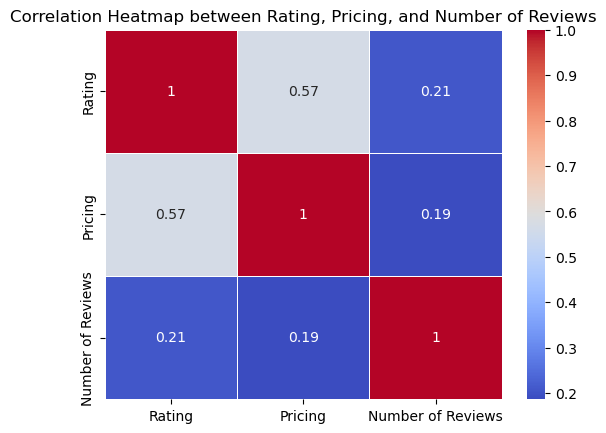

In [57]:
#Visualizations with restaurant_info data frame
# Calculate correlations
corr = restaurant_info[['Rating', 'Pricing', 'Number of Reviews']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Rating, Pricing, and Number of Reviews')
plt.show()

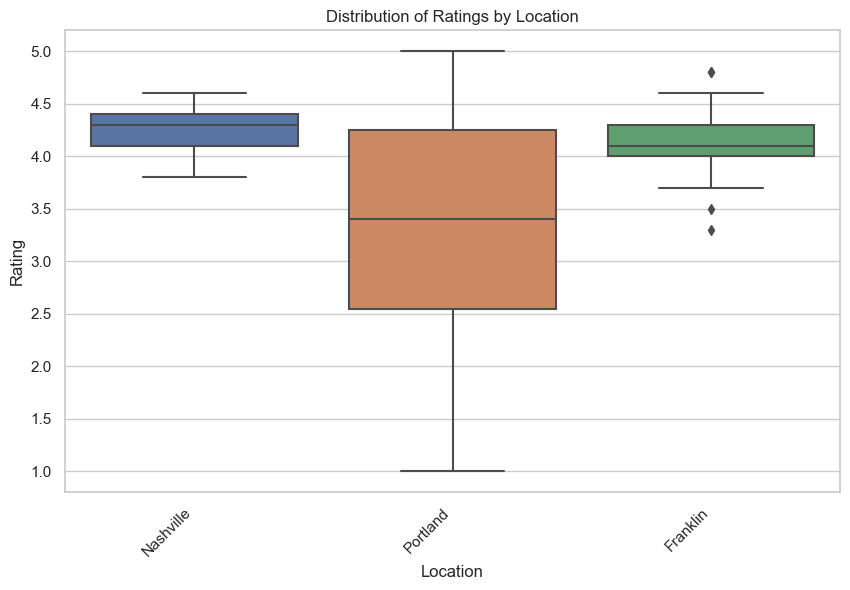

In [64]:
#Visualizations with restaurant_info data frame
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the box plot for Distribution of Ratings by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Rating', data=restaurant_info)
plt.title('Distribution of Ratings by Location')
plt.xticks(rotation=45, horizontalalignment='right') # This ensures location names are readable
plt.show()


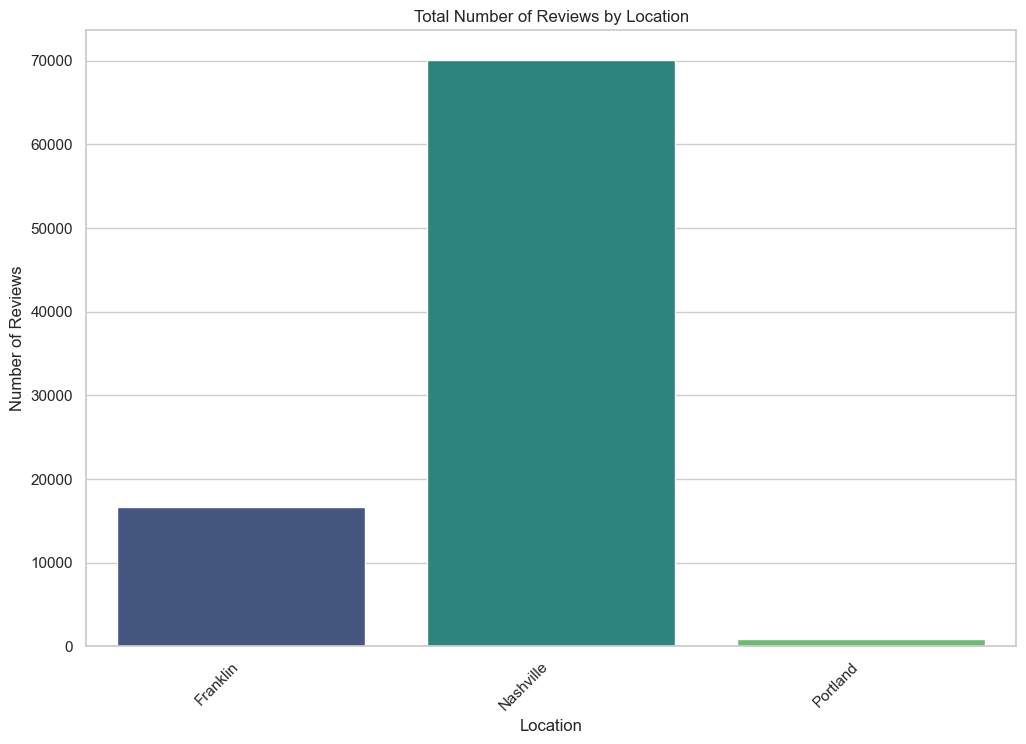

In [72]:
#Visualizations with restaurant_info data frame
# Set the Seaborn theme 
sns.set_theme(style="whitegrid")

# Aggregate the total number of reviews by location
total_reviews_by_location = restaurant_info.groupby('Location')['Number of Reviews'].sum().reset_index()

# Create the bar plot for Total Number of Reviews by Location
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Number of Reviews', data=total_reviews_by_location, palette='viridis')
plt.title('Total Number of Reviews by Location')
plt.xticks(rotation=45, horizontalalignment='right')  
plt.show()

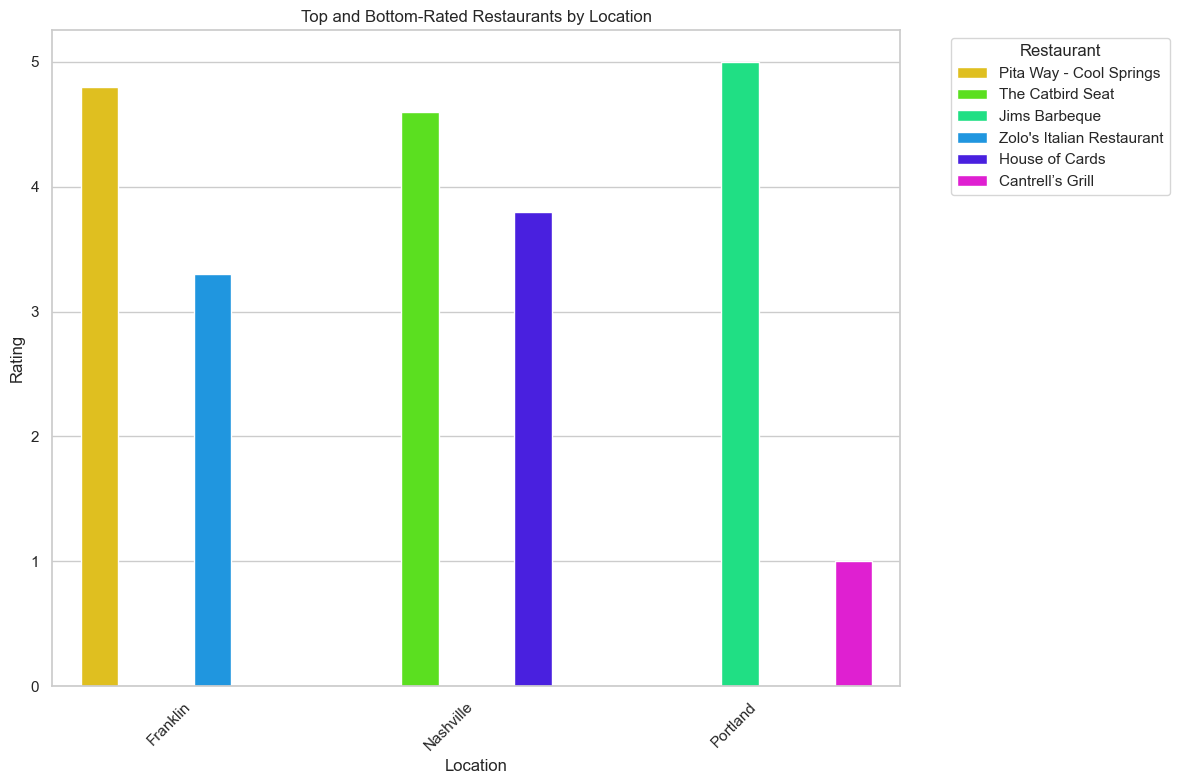

In [79]:

# Sort the DataFrame by Location and Rating
sorted_restaurants = restaurant_info.sort_values(by=['Location', 'Rating'])

# Top and bottom-rated restaurants by taking the first and last entries for each location
top_rated = sorted_restaurants.groupby('Location').tail(1)
bottom_rated = sorted_restaurants.groupby('Location').head(1)

# Combining top and bottom-rated restaurants into a single DataFrame for plotting
top_bottom_rated = pd.concat([top_rated, bottom_rated])

# Mapping each restaurant's name to a unique color
unique_restaurants = top_bottom_rated['Name'].unique()
palette = sns.color_palette("hsv", len(unique_restaurants)) 
color_map = dict(zip(unique_restaurants, palette))

# Creating a bar plot with the defined color map
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Rating', hue='Name', data=top_bottom_rated, palette=color_map)
plt.title('Top and Bottom-Rated Restaurants by Location')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
